Note book for thaks e)

In [50]:
import sys
import tensorflow.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [51]:
print(f"Tensor Flow Version: {tf.__version__}")
#print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print("GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Tensor Flow Version: 2.10.0

Python 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
GPUs Available:  1


True

In [52]:
import pickle
dict = pickle.load(open('california-housing-dataset.pkl', 'rb'))
x_train, y_train = dict['x_train'], dict['y_train']
x_test, y_test = dict['x_test'], dict['y_test']

print(x_train.shape, y_train.shape)
print(x_train[1,:], y_train[1])

(15480, 8) (15480,)
[   2.7639        9.            8.75862069    1.72413793   66.
    2.27586207   39.04       -122.69      ] 1.125


In [53]:
for i in range(8):
    x_train[:,i] = x_train[:,i]
    print(max(x_train[:,i]), min(x_train[:,i]))
print(max(y_train), min(y_train[:]))
    

15.0001 0.4999
52.0 1.0
141.9090909090909 0.8461538461538461
34.06666666666667 0.3333333333333333
35682.0 5.0
1243.3333333333333 0.6923076923076923
41.95 32.54
-114.31 -124.35
5.00001 0.14999


In [54]:
x_train_n = np.zeros((len(y_train),8))

x_train_n[:,0] = x_train[:,0]/15.1
x_train_n[:,1] = x_train[:,1]/52
x_train_n[:,2] = x_train[:,2]/142
x_train_n[:,3] = x_train[:,3]/34.1
x_train_n[:,4] = x_train[:,4]/35682.0
x_train_n[:,5] = x_train[:,5]/1243.4
x_train_n[:,6] = (x_train[:,6]-32.5)/10
x_train_n[:,7] = (x_train[:,7]+124.4)/10.1


#clean the data

print(len(x_train), y_train.shape)

y_train_clean = []
x_train_clean = []

for i  in range(len(y_train)):
    if y_train[i] < 5:
        y = y_train[i]
        x = x_train_n[i,:]
        y_train_clean = np.append(y_train_clean, y)
        x_train_clean = np.append(x_train_clean, x)

x_train_clean = np.reshape(x_train_clean, [14729,8])

print(y_train_clean.shape, x_train_clean.shape)

#create two classes
y_train_clean[y_train_clean < 2] = 0
y_train_clean[y_train_clean >= 2] = 1

15480 (15480,)
(14729,) (14729, 8)


In [55]:
for i in range(8):
    x_train_clean[:,i] = x_train_clean[:,i]
    print(max(x_train_clean[:,i]), min(x_train_clean[:,i]))
print(max(y_train_clean), min(y_train_clean))

0.9933841059602649 0.03310596026490066
1.0 0.019230769230769232
0.9333333333333333 0.005958829902491874
0.9990224828934506 0.009775171065493644
1.0 0.00014012667451376043
0.9999463835719263 0.0005567859838408334
0.9450000000000003 0.003999999999999915
0.9990099009900993 0.004950495049506076
1.0 0.0


In [56]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization
tf.random.set_seed(1234)

In [58]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_shape=[8], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the keras model on the dataset

history = model.fit(x_train_clean[:,:], #training data
                    y_train_clean[:],  #Labels
                    epochs=200,
                    batch_size=128,
                    verbose=1,
                    validation_split = 0.1
                   )



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 8)                 72        
                                                                 
 dense_66 (Dense)            (None, 16)                144       
                                                                 
 dense_67 (Dense)            (None, 32)                544       
                                                                 
 dense_68 (Dense)            (None, 64)                2112      
                                                                 
 dense_69 (Dense)            (None, 128)               8320      
                                                                 
 dense_70 (Dense)            (None, 256)               33024     
                                                                 
 dense_71 (Dense)            (None, 128)              

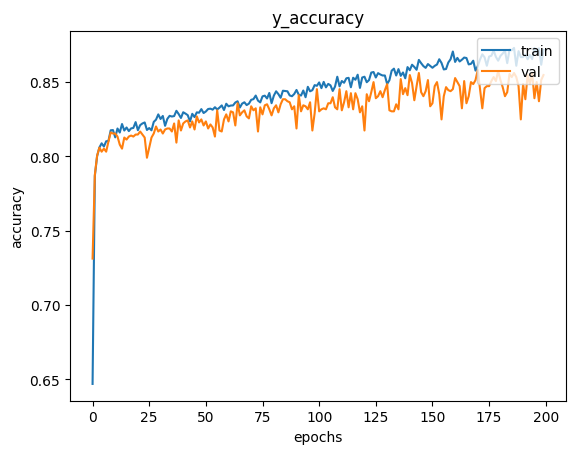

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('y_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [60]:
###TEST DATA
x_test_n = np.zeros((len(x_test),8))

x_test_n[:,0] = x_test[:,0]/15.1
x_test_n[:,1] = x_test[:,1]/52
x_test_n[:,2] = x_test[:,2]/142
x_test_n[:,3] = x_test[:,3]/34.1
x_test_n[:,4] = x_test[:,4]/35682.0
x_test_n[:,5] = x_test[:,5]/1243.4
x_test_n[:,6] = (x_test[:,6]-32.5)/10
x_test_n[:,7] = (x_test[:,7]+124.4)/10.1

In [61]:
y_test[y_test<2] = 0
y_test[y_test>=2] = 1

In [62]:


# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_n, y_test)
print(f'Binary Crossentropy Loss on Test Set: {loss}')
print(f'Accuracy on Test Set: {accuracy}')

# Make predictions
predictions = model.predict(x_test_n)

162/162 [==============================] - 1s 6ms/step - loss: 0.3102 - accuracy: 0.8665
Binary Crossentropy Loss on Test Set: 0.31015169620513916
Accuracy on Test Set: 0.8664728403091431
162/162 [==============================] - 1s 3ms/step
